<a href="https://colab.research.google.com/github/renyuanL/_2019/blob/master/_ryDSP_chap03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 3  Non-periodic signals

http://greenteapress.com/thinkdsp/html/thinkdsp004.html
    

https://en.wikipedia.org/wiki/Chirp

## Chirp

A chirp is a signal in which the frequency increases (up-chirp) or decreases (down-chirp) with time. 

In some sources, the term chirp is used interchangeably with sweep signal.[1] 

It is commonly used in sonar, radar, and laser, but has other applications, such as in spread-spectrum communications.


If a waveform is defined as:

$
{\displaystyle x(t)=\sin \left(\phi (t)\right)} 
\\ \text{ or } \\
{\displaystyle x(t)=\cos \left(\phi (t)\right)} 
$

then the instantaneous frequency is defined to be the phase rate:

$
{\displaystyle f(t)={\frac {1}{2\pi }}{\frac {d\phi (t)}{dt}}} 
$

and the (instantaneous) chirpyness is defined to be the frequency rate:[a]

$
{\displaystyle c(t)={\frac {1}{2\pi }}{\frac {d^{2}\phi (t)}{dt^{2}}}={\frac {df(t)}{dt}}} 
$

----

$
\phi(t) = \omega t +\phi_0 
\rightarrow
\frac{d\phi(t)}{dt} = \omega
$

----

$
\phi(t) = \frac{1}{2} \alpha t^2 + \beta t + \gamma
\rightarrow
\frac{d\phi(t)}{dt} = \alpha t + \beta == \omega(t)
$

$
\begin{cases}
\alpha t_0 + \beta == \omega(t_0)==\omega_0
\\
\alpha t_1 + \beta == \omega(t_1)==\omega_1
\end{cases}
$

$
\begin{cases}
\alpha = \frac{\omega_1 - \omega_0}{t_1 - t_0}
\\
\beta = \omega_0 - \alpha t_0 = \frac{t_1 \omega_0 - t_0 \omega_1}{t_1 - t_0}
\end{cases}
$

```python
class Chirp(Signal):
    """Represents a signal with variable frequency."""
    
    def __init__(self, start=440, end=880, amp=1.0):
        """Initializes a linear chirp.

        start: float frequency in Hz
        end: float frequency in Hz
        amp: float amplitude, 1.0 is nominal max
        """
        self.start = start
        self.end = end
        self.amp = amp

    @property
    def period(self):
        """Period of the signal in seconds.

        returns: float seconds
        """
        return ValueError('Non-periodic signal.')

    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        freqs = np.linspace(self.start, self.end, len(ts)-1)
        return self._evaluate(ts, freqs)

    def _evaluate(self, ts, freqs):
        """Helper function that evaluates the signal.

        ts: float array of times
        freqs: float array of frequencies during each interval
        """
        dts = np.diff(ts)
        dps = PI2 * freqs * dts
        phases = np.cumsum(dps)
        phases = np.insert(phases, 0, 0)
        ys = self.amp * np.cos(phases)
        return ys
```


```python
class Wave:
    """Represents a discrete-time waveform."""
    def __init__(self, ys, ts=None, framerate=None):
        """Initializes the wave.
        ys: wave array
        ts: array of times
        framerate: samples per second
        """
        self.ys=         np.asanyarray(ys)
        self.framerate=  framerate if framerate is not None else 11025

        if ts is None:
            self.ts= np.arange(len(ys)) / self.framerate
        else:
            self.ts= np.asanyarray(ts)
```


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Add for run on Google Colab
!wget -c https://raw.githubusercontent.com/renyuanL/_2019/master/thinkdsp.py
!wget -c https://raw.githubusercontent.com/renyuanL/_2019/master/thinkplot.py
!wget -c https://raw.githubusercontent.com/renyuanL/_2019/master/thinkstats2.py
    

--2019-03-20 04:54:25--  https://raw.githubusercontent.com/renyuanL/_2019/master/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43658 (43K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  42.63K  --.-KB/s    in 0.02s   

2019-03-20 04:54:30 (1.70 MB/s) - ‘thinkdsp.py’ saved [43658/43658]

--2019-03-20 04:54:31--  https://raw.githubusercontent.com/renyuanL/_2019/master/thinkplot.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19445 (19K) [text/plain]
Saving to: ‘thinkplot.py’

thinkplot.

In [2]:
from thinkdsp import Wave


Fs= 10000
t= np.linspace(0,1, Fs+1)

x= np.random.random(len(t))

x= np.cos(2*np.pi*1000*t)

w= Wave(x, framerate= Fs)
w.write(filename= '_tmp.wav')
w.make_audio()

Writing _tmp.wav


In [3]:
from IPython.display import Audio
Audio(filename='_tmp.wav')

In [0]:
from IPython.display import Audio

class RyWave(Wave):
    
    def __init__(self, ys= None, ts= None, framerate= None):
        
        if framerate is None:
            framerate= 10000 
        if ys is None:
            Wave.__init__(self,[],ts,framerate)
        else:
            Wave.__init__(self,ys,ts,framerate)
        
    def make_audio(self, filename=None):
        if filename==None:
            a= Wave.make_audio(self) 
        else:
            a= Audio(filename= filename)
        return a


Writing _tmp.wav


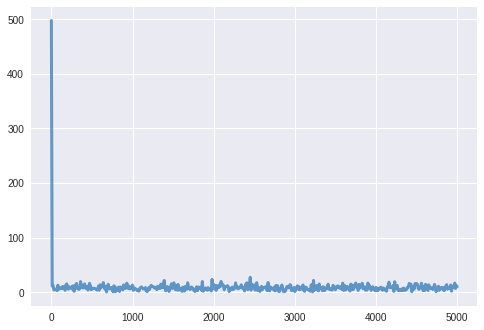

In [5]:
x= np.random.random(1000)
w= RyWave(x)
w.make_audio() 
w.plot()
s= w.make_spectrum()
s.plot()
w.write(filename='_tmp.wav')
w.make_audio('_tmp.wav')

In [6]:
w= RyWave()
w.make_audio(filename= '_tmp.wav')

In [7]:
Fs= 10000
t= np.linspace(0,1, Fs+1)

x= np.random.random(len(t))

x= np.cos(2*np.pi*1000*t)

w= RyWave(ys=x, framerate= Fs)
#w.write(filename= '_tmp.wav')
w.make_audio()

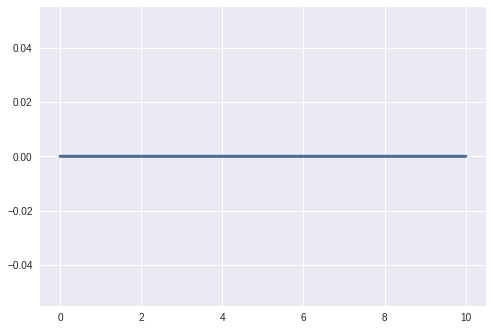

In [8]:
import thinkdsp as td

Wave= td.Wave

class Signal:
    """Represents a time-varying signal."""

    def __add__(self, other):
        """Adds two signals.
        other: Signal
        returns: Signal
        """
        if other == 0:
            return self
        return SumSignal(self, other)

    __radd__ = __add__

    @property
    def period(self):
        """Period of the signal in seconds (property).
        Since this is used primarily for purposes of plotting,
        the default behavior is to return a value, 0.1 seconds,
        that is reasonable for many signals.
        returns: float seconds
        """
        return 1

    def plot(self, framerate= 10000):
        """Plots the signal.

        The default behavior is to plot three periods.

        framerate: samples per second
        """
        duration= self.period * 10
        wave=     self.make_wave(duration, start=0, framerate=framerate)
        wave.plot()
    
    def make_wave(self, duration=1, start=0, framerate=11025):
        """Makes a Wave object.

        duration: float seconds
        start: float seconds
        framerate: int frames per second

        returns: Wave
        """
        n = round(duration * framerate)
        ts = start + np.arange(n) / framerate
        ys = self.evaluate(ts)
        return Wave(ys, ts, framerate=framerate)
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.
        ts: float array of times        
        returns: float wave array
        """
        y= np.zeros(len(ts))        
        return y

x= Signal()
x.plot()

In [0]:
import numpy as np
_2π= PI2= np.pi * 2

#import thinkdsp as td
#Signal= td.Signal

class Chirp(Signal):
    """Represents a signal with variable frequency."""  
    def __init__(self, start= 440, end= 880, amp= 1.0):
        """Initializes a linear chirp.
        start: float frequency in Hz
        end:   float frequency in Hz
        amp:   float amplitude, 1.0 is nominal max
        """
        self.start= start
        self.end=   end
        self.amp=   amp

    @property
    def period(self):
        """Period of the signal in seconds.
        returns: float seconds
        """
        return ValueError('Non-periodic signal.')

    def evaluate(self, ts):
        """Evaluates the signal at the given times.
        ts: float array of times        
        returns: float wave array
        """
        freqs = np.linspace(self.start, self.end, len(ts)-1)
        return self._evaluate(ts, freqs)

    def _evaluate(self, ts, freqs):
        """Helper function that evaluates the signal.
        ts: float array of times
        freqs: float array of frequencies during each interval
        """
        dts = np.diff(ts)
        dps = PI2 * freqs * dts
        phases = np.cumsum(dps)
        phases = np.insert(phases, 0, 0)
        ys = self.amp * np.cos(phases)
        return ys


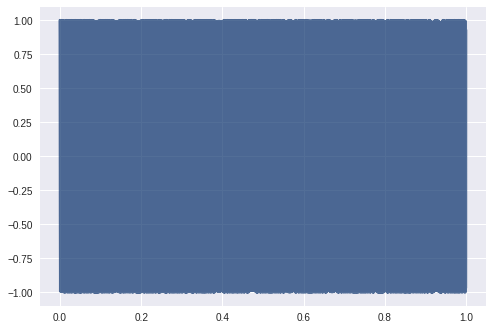

In [10]:
x= Chirp()
w= x.make_wave()
w.plot()

In [11]:
w.make_audio()

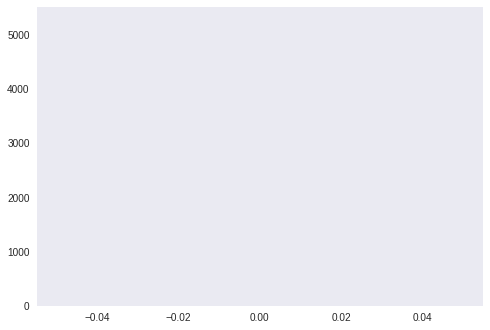

In [12]:
s= w.make_spectrogram(256)
s.plot()

$
\frac{dφ}{dt} = 2 π f(t) 
\\
dφ = 2 π f(t) dt 
\\
\\
φ(t) = \int^{t} dφ = 2 \pi \int^{t} f(\tau) d\tau
\\
y(t)= cos(φ(t))
$

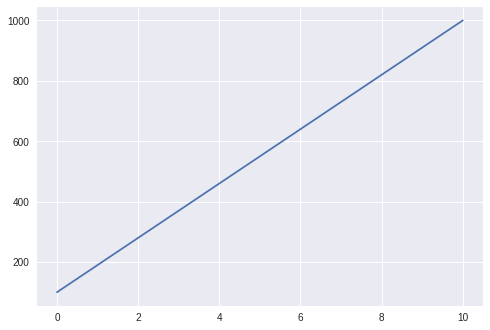

In [13]:
_2π=   2 * np.pi

Fs= 10000 # Hz
T=  10 # sec

t=   np.linspace(0, T, T*Fs+1)
dt=  np.diff(t)

#
# specify f = f(t), the time-varying frequency
#
f=   np.linspace(100, 1000, len(dt)) #== a t + b

#f=   np.logspace(np.log10(100), np.log10(1000), len(dt)) #== a t + b

plt.plot(t[1:],f)

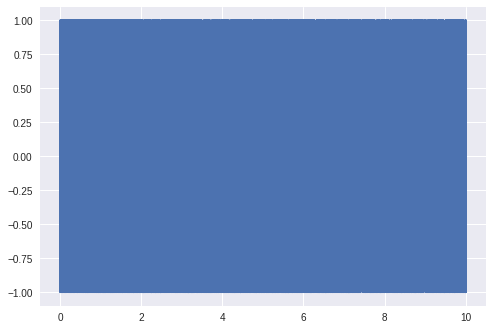

In [14]:
dϕ=  _2π * f * dt
ϕ=   np.cumsum(dϕ)
ϕ=   np.insert(ϕ, 0, 0)

y=   np.cos(ϕ)

import matplotlib.pyplot as plt
plt.plot(t,y)
plt.grid(True)

Audio(y,rate=Fs)

In [15]:
x= np.array([0,1,2,3,4])
np.cumsum(x)

array([ 0,  1,  3,  6, 10])

In [0]:
#help(np.insert)

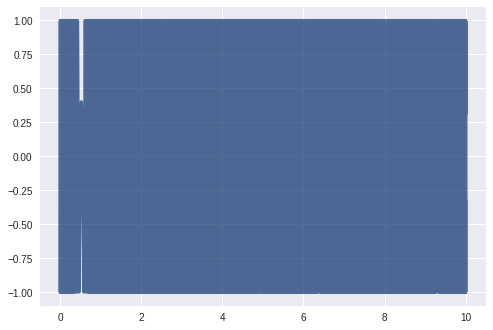

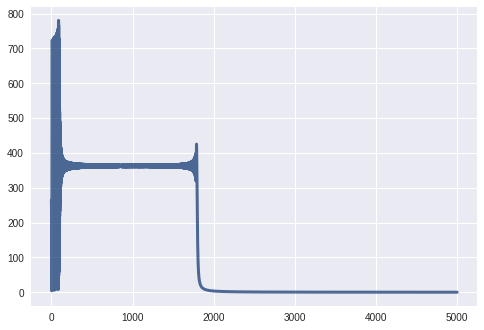

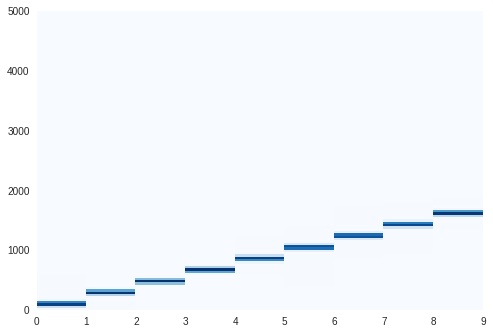

In [17]:
Fs= 10000

t0= 0
t1= 10

f0= 100
f1= 2000

t= np.linspace(t0,t1,(t1-t0)*Fs+1)

f= np.linspace(f0,f1,(t1-t0)*Fs+1)
f= np.logspace(np.log10(f0), np.log10(f1),(t1-t0)*Fs+1)

a= _2π * (f1-f0)/(t1-t0)
b= _2π * (f1*t0-f0*t1)/(t1-t0)
c= _2π * .5

ϕ= a/2 * t**2 + b * t + c
y= np.cos(ϕ)

w= Wave(y,framerate=Fs)

plt.figure()
w.plot()

plt.figure()
w.make_spectrum().plot()

plt.figure()
w.make_spectrogram(seg_length=256).plot()


#plt.plot(t,y)
Audio(y,rate= Fs)

## ThinkDSP

This notebook contains code examples from Chapter 3: Non-periodic signals

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [0]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

### Chirp

Make a linear chirp from A3 to A5.

In [19]:
signal = thinkdsp.Chirp(start=220, end=880)
wave1 = signal.make_wave(duration=1)
wave1.make_audio()

Here's what the waveform looks like near the beginning.

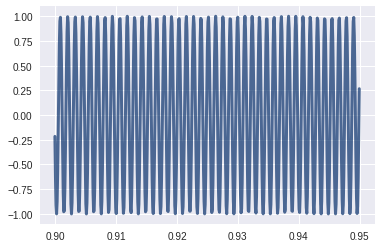

In [20]:
wave1.segment(start=.9, duration=.05).plot()

And near the end.

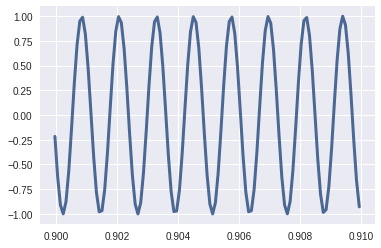

In [21]:
wave1.segment(start=0.9, duration=0.01).plot()

Here's an exponential chirp with the same frequency range and duration.

In [22]:
signal = thinkdsp.ExpoChirp(start=220, end=880)
wave2 = signal.make_wave(duration=2)
wave2.make_audio()

## Leakage

Spectral leakage is when some of the energy at one frequency appears at another frequency (usually nearby).

Let's look at the effect of leakage on a sine signal (which only contains one frequency component).

In [0]:
signal = thinkdsp.SinSignal(freq=440)

If the duration is an integer multiple of the period, the beginning and end of the segment line up, and we get minimal leakage.

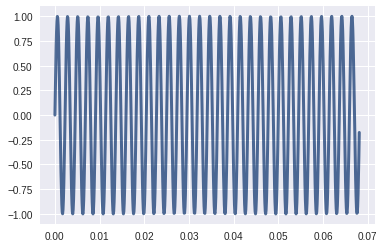

In [24]:
duration = signal.period * 30
wave = signal.make_wave(duration)
wave.plot()

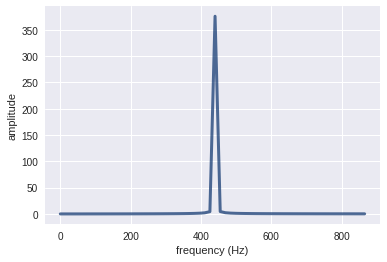

In [25]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
thinkplot.config(xlabel='frequency (Hz)', ylabel='amplitude', legend=False)

If the duration is not a multiple of a period, the leakage is pretty bad.

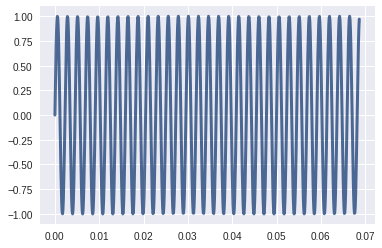

In [26]:
duration = signal.period * 30.25
wave = signal.make_wave(duration)
wave.plot()

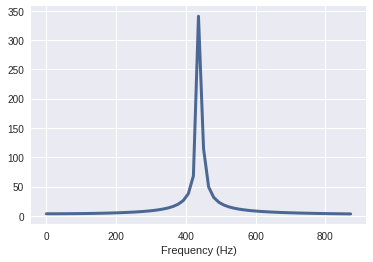

In [27]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
thinkplot.config(xlabel='Frequency (Hz)')

Windowing helps (but notice that it reduces the total energy).

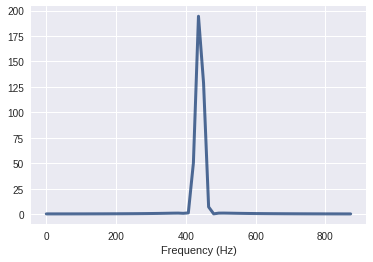

In [28]:
wave.hamming()
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
thinkplot.config(xlabel='Frequency (Hz)')

## Spectrogram

If you blindly compute the DFT of a non-periodic segment, you get "motion blur".

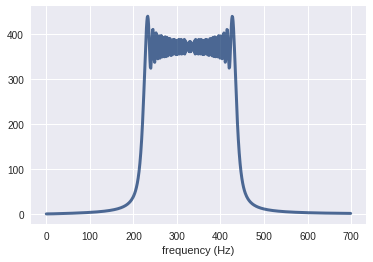

In [29]:
signal = thinkdsp.Chirp(start=220, end=440)
wave = signal.make_wave(duration=1)
spectrum = wave.make_spectrum()
spectrum.plot(high=700)
thinkplot.config(xlabel='frequency (Hz)')

A spectrogram is a visualization of a short-time DFT that lets you see how the spectrum varies over time.

In [0]:
def plot_spectrogram(wave, seg_length):
    spectrogram = wave.make_spectrogram(seg_length)
    print('Time resolution (s)', spectrogram.time_res)
    print('Frequency resolution (Hz)', spectrogram.freq_res)
    spectrogram.plot(high=700)
    thinkplot.show(xlabel='Time(s)', ylabel='Frequency (Hz)')

Time resolution (s) 0.046439909297052155
Frequency resolution (Hz) 21.533203125


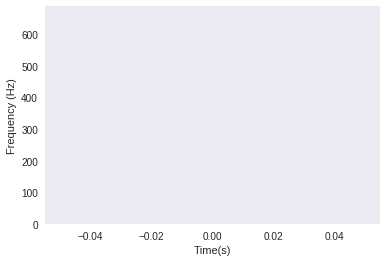

<Figure size 576x432 with 0 Axes>

In [31]:
signal = thinkdsp.Chirp(start=220, end=440)
wave = signal.make_wave(duration=1, framerate=11025)
plot_spectrogram(wave, 512)

If you increase the segment length, you get better frequency resolution, worse time resolution.

Time resolution (s) 0.09287981859410431
Frequency resolution (Hz) 10.7666015625


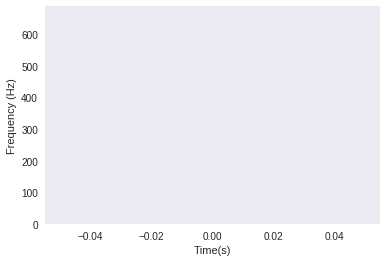

<Figure size 576x432 with 0 Axes>

In [32]:
plot_spectrogram(wave, 1024)

If you decrease the segment length, you get better time resolution, worse frequency resolution.

Time resolution (s) 0.023219954648526078
Frequency resolution (Hz) 43.06640625


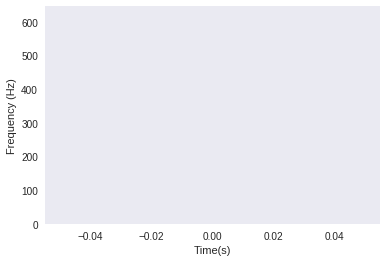

<Figure size 576x432 with 0 Axes>

In [33]:
plot_spectrogram(wave, 256)

In [34]:
slider = widgets.IntSlider(min=128, max=4096, value=100, step=128)
interact(plot_spectrogram, wave=fixed(wave), seg_length=slider);

interactive(children=(IntSlider(value=128, description='seg_length', max=4096, min=128, step=128), Output()), …

## Spectrum of a chirp

The following interaction lets you customize the Eye of Sauron as you vary the start and end frequency of the chirp.

In [0]:
def eye_of_sauron(start, end):
    """Plots the spectrum of a chirp.
    
    start: initial frequency
    end: final frequency
    """
    signal = thinkdsp.Chirp(start=start, end=end)
    wave = signal.make_wave(duration=0.5)
    spectrum = wave.make_spectrum()
    
    spectrum.plot(high=1200)
    thinkplot.config(xlabel='frequency (Hz)', ylabel='amplitude')
    
    #TODO: add player

In [36]:
slider1 = widgets.FloatSlider(min=100, max=1000, value=100, step=50)
slider2 = widgets.FloatSlider(min=100, max=1000, value=200, step=50)
interact(eye_of_sauron, start=slider1, end=slider2);

interactive(children=(FloatSlider(value=100.0, description='start', max=1000.0, min=100.0, step=50.0), FloatSl…

# Exercises


## The Top 10 Benefits of Regular Exercise
https://www.healthline.com/nutrition/10-benefits-of-exercise


# Every students choose at least 1 from the following. 
## Do it and present it...


Solutions to these exercises are in chap03soln.ipynb.

## Exercise 1   
Run and listen to the examples in chap03.ipynb, which is in the repository for this book, and also available at http://tinyurl.com/thinkdsp03.
In the leakage example, try replacing the Hamming window with one of the other windows provided by NumPy, and see what effect they have on leakage. See http://docs.scipy.org/doc/numpy/reference/routines.window.html

## Exercise 2   
Write a class called SawtoothChirp that extends Chirp and overrides evaluate to generate a sawtooth waveform with frequency that increases (or decreases) linearly.
Hint: combine the evaluate functions from Chirp and SawtoothSignal.

Draw a sketch of what you think the spectrogram of this signal looks like, and then plot it. The effect of aliasing should be visually apparent, and if you listen carefully, you can hear it.

## Exercise 3   
Make a sawtooth chirp that sweeps from 2500 to 3000 Hz, then use it to make a wave with duration 1 s and frame rate 20 kHz. Draw a sketch of what you think the spectrum will look like. Then plot the spectrum and see if you got it right.

## Exercise 4   
In musical terminology, a “glissando” is a note that slides from one pitch to another, so it is similar to a chirp.
Find or make a recording of a glissando and plot a spectrogram of the first few seconds. One suggestion: George Gershwin’s Rhapsody in Blue starts with a famous clarinet glissando, which you can download from http://archive.org/details/rhapblue11924.

## Exercise 5  
A trombone player can play a glissando by extending the trombone slide while blowing continuously. As the slide extends, the total length of the tube gets longer, and the resulting pitch is inversely proportional to length.
Assuming that the player moves the slide at a constant speed, how does frequency vary with time?

Write a class called TromboneGliss that extends Chirp and provides evaluate. Make a wave that simulates a trombone glissando from C3 up to F3 and back down to C3. C3 is 262 Hz; F3 is 349 Hz.

Plot a spectrogram of the resulting wave. Is a trombone glissando more like a linear or exponential chirp?

## Exercise 6   
Make or find a recording of a series of vowel sounds and look at the spectrogram. Can you identify different vowels?